# Disparity Estimation

In [1]:
import numpy as np
import numba as nb
import cv2
import matplotlib.pyplot as plt
import scipy.linalg as LA
from utils import plots
from utils import imgs
from tqdm import tqdm

In [4]:
I1, I2 = cv2.imread('images/ex06/Left.ppm', 0) / 255.0, cv2.imread('images/ex06/Right.ppm', 0) / 255.0

P1 = np.genfromtxt('images/ex06/proj_matrix00.dat').reshape((3, 4))
P2 = np.genfromtxt('images/ex06/proj_matrix01.dat').reshape((3, 4))

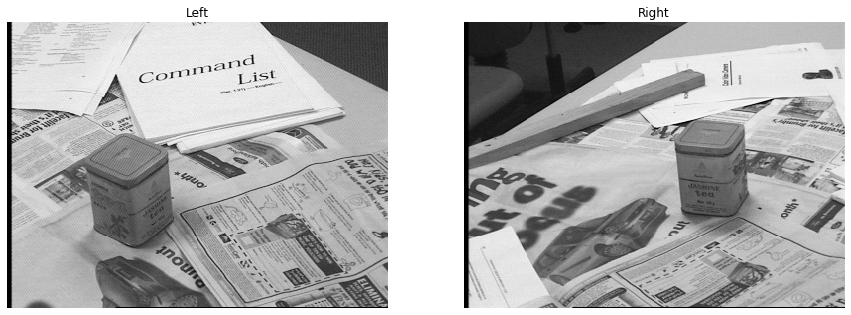

In [18]:
plots.grid([I1, I2], ['Left', 'Right'], 1, 2)

In [34]:
C1 = LA.null_space(P1)
E2 = (P2 @ C1).flatten()

Ex = np.array([[0, -E2[2], E2[1]], [E2[2], 0, -E2[0]], [-E2[1], E2[0], 0]])
F12 = Ex @ P2 @ LA.pinv(P1)

# Enforce Rank 2 constrain
u, s, vt = LA.svd(F12)
s[2] = 0.0
F12 = u @ (s[..., None] * vt)

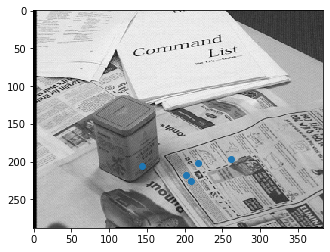

In [41]:
px = np.random.randint(140, 300, size=5)
py = np.random.randint(180, 250, size=5)

plt.imshow(I1, cmap='gray')
plt.plot(px, py, 'o')

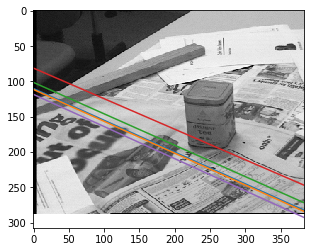

In [43]:
plt.imshow(I2, cmap='gray')
for i in range(5):
    a, b, c = (F12 @ np.array([[px[i]], [py[i]], [1]])).flatten()

    x = np.arange(I2.shape[1])
    y = (-a*x - c)/b
    
    plt.plot(x, y)

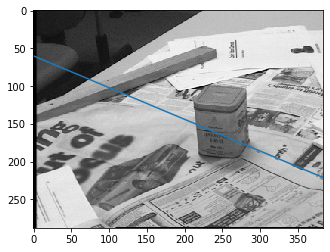